In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Bussiness Problem
To present a shorter version of the original text while preserving the semantics. Here, you can use different traditional and advanced methods to implement automatic text summarization, and then compare the results of each method to conclude which is the best to use for your corpus.


## Loading Dataset

In [30]:
df=pd.read_csv("Wings-Of-Fire-converted.csv")

In [31]:
df

,"ACHIEVERS I started my work at NASA at the Langley Research Centre (LRC) in Hampton, Virginia."
0,This is primarily an R&D centre for advanced a...
1,of LRC is of a piece of sculpture depicting a ...
2,research and the other technological developme...
3,interconnection between research and developme...
4,"Centre (GSFC) at Greenbelt, Maryland. This Cen..."
...,...
1386,"them to his own satisfaction. Judgement aside,..."
1387,"without pain. As for my afflicted friends, the..."
1388,may charge me with murder – Or want of sense (...
1389,approach to a false pretence Was never among m...


In [32]:
#Changing the column name
df.columns=['Observations']

In [33]:
df

,Observations
0,This is primarily an R&D centre for advanced a...
1,of LRC is of a piece of sculpture depicting a ...
2,research and the other technological developme...
3,interconnection between research and developme...
4,"Centre (GSFC) at Greenbelt, Maryland. This Cen..."
...,...
1386,"them to his own satisfaction. Judgement aside,..."
1387,"without pain. As for my afflicted friends, the..."
1388,may charge me with murder – Or want of sense (...
1389,approach to a false pretence Was never among m...


In [34]:
# Joining the list into one string/text
df_Observations=' '.join(df)
df_Observations

'Observations'

In [35]:
df.shape

(1391, 1)

In [36]:
df.head()

,Observations
0,This is primarily an R&D centre for advanced a...
1,of LRC is of a piece of sculpture depicting a ...
2,research and the other technological developme...
3,interconnection between research and developme...
4,"Centre (GSFC) at Greenbelt, Maryland. This Cen..."


In [37]:
df.dropna(inplace=True)         #checking for null values
df.isnull().sum()

Observations    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1390
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Observations  1391 non-null   object
dtypes: object(1)
memory usage: 21.7+ KB


In [39]:
df.columns.values

array(['Observations'], dtype=object)

## Text Preprocessing

In [40]:
df=[Observations.strip() for Observations in df.Observations] # remove both the leading and the trailing characters
df=[Observations for Observations in df if Observations] # removes empty strings, because they are considered in Python as False
df[0:10]

['This is primarily an R&D centre for advanced aerospace technology. One of my most vivid memories',
 'of LRC is of a piece of sculpture depicting a charioteer driving two horses, one representing scientific',
 'research and the other technological development, metaphorically encapsulating the',
 'interconnection between research and development. From LRC I went to the Goddard Space Flight',
 'Centre (GSFC) at Greenbelt, Maryland. This Centre develops and manages most of NASA’s earth-',
 'orbiting science and applications satellites. It operates NASA’s tracking networks for all space',
 'missions. Towards the end of my visit, Iwent to the Wallops Flight Facility at Wallops Island in East',
 'Coast, Virginia. This place was the base for NASA’s sounding rocket programme. Here, I saw a',
 'painting prominently displayed in the reception lobby. It depicted a battle scene with a few rockets',
 'flying in the background. A painting with this theme should be the most commonplace thing at a']

In [41]:
# Joining the list into one string/text
df_Observations=' '.join(df)
df_Observations

'This is primarily an R&D centre for advanced aerospace technology. One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses, one representing scientific research and the other technological development, metaphorically encapsulating the interconnection between research and development. From LRC I went to the Goddard Space Flight Centre (GSFC) at Greenbelt, Maryland. This Centre develops and manages most of NASA’s earth- orbiting science and applications satellites. It operates NASA’s tracking networks for all space missions. Towards the end of my visit, Iwent to the Wallops Flight Facility at Wallops Island in East Coast, Virginia. This place was the base for NASA’s sounding rocket programme. Here, I saw a painting prominently displayed in the reception lobby. It depicted a battle scene with a few rockets flying in the background. A painting with this theme should be the most commonplace thing at a Flight Facility, but the painting caugh

In [42]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
df_Observations=tknzr.tokenize(df_Observations)
print(df_Observations)

['This', 'is', 'primarily', 'an', 'R', '&', 'D', 'centre', 'for', 'advanced', 'aerospace', 'technology', '.', 'One', 'of', 'my', 'most', 'vivid', 'memories', 'of', 'LRC', 'is', 'of', 'a', 'piece', 'of', 'sculpture', 'depicting', 'a', 'charioteer', 'driving', 'two', 'horses', ',', 'one', 'representing', 'scientific', 'research', 'and', 'the', 'other', 'technological', 'development', ',', 'metaphorically', 'encapsulating', 'the', 'interconnection', 'between', 'research', 'and', 'development', '.', 'From', 'LRC', 'I', 'went', 'to', 'the', 'Goddard', 'Space', 'Flight', 'Centre', '(', 'GSFC', ')', 'at', 'Greenbelt', ',', 'Maryland', '.', 'This', 'Centre', 'develops', 'and', 'manages', 'most', 'of', 'NASA', '’', 's', 'earth', '-', 'orbiting', 'science', 'and', 'applications', 'satellites', '.', 'It', 'operates', 'NASA', '’', 's', 'tracking', 'networks', 'for', 'all', 'space', 'missions', '.', 'Towards', 'the', 'end', 'of', 'my', 'visit', ',', 'Iwent', 'to', 'the', 'Wallops', 'Flight', 'Facil

In [43]:
# Again Joining the list into one string/text
df_Observations_text=' '.join(df_Observations)
df_Observations_text

'This is primarily an R & D centre for advanced aerospace technology . One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses , one representing scientific research and the other technological development , metaphorically encapsulating the interconnection between research and development . From LRC I went to the Goddard Space Flight Centre ( GSFC ) at Greenbelt , Maryland . This Centre develops and manages most of NASA ’ s earth - orbiting science and applications satellites . It operates NASA ’ s tracking networks for all space missions . Towards the end of my visit , Iwent to the Wallops Flight Facility at Wallops Island in East Coast , Virginia . This place was the base for NASA ’ s sounding rocket programme . Here , I saw a painting prominently displayed in the reception lobby . It depicted a battle scene with a few rockets flying in the background . A painting with this theme should be the most commonplace thing at a Flight Facili

In [44]:
# Remove Punctuations 
no_punc_text=df_Observations_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'This is primarily an R  D centre for advanced aerospace technology  One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses  one representing scientific research and the other technological development  metaphorically encapsulating the interconnection between research and development  From LRC I went to the Goddard Space Flight Centre  GSFC  at Greenbelt  Maryland  This Centre develops and manages most of NASA ’ s earth  orbiting science and applications satellites  It operates NASA ’ s tracking networks for all space missions  Towards the end of my visit  Iwent to the Wallops Flight Facility at Wallops Island in East Coast  Virginia  This place was the base for NASA ’ s sounding rocket programme  Here  I saw a painting prominently displayed in the reception lobby  It depicted a battle scene with a few rockets flying in the background  A painting with this theme should be the most commonplace thing at a Flight Facility  but the paintin

In [45]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'This is primarily an R  D centre for advanced aerospace technology  One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses  one representing scientific research and the other technological development  metaphorically encapsulating the interconnection between research and development  From LRC I went to the Goddard Space Flight Centre  GSFC  at Greenbelt  Maryland  This Centre develops and manages most of NASA ’ s earth  orbiting science and applications satellites  It operates NASA ’ s tracking networks for all space missions  Towards the end of my visit  Iwent to the Wallops Flight Facility at Wallops Island in East Coast  Virginia  This place was the base for NASA ’ s sounding rocket programme  Here  I saw a painting prominently displayed in the reception lobby  It depicted a battle scene with a few rockets flying in the background  A painting with this theme should be the most commonplace thing at a Flight Facility  but the paintin

In [46]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Aniket
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aniket
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.tokenize import word_tokenize,sent_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['This', 'is', 'primarily', 'an', 'R', 'D', 'centre', 'for', 'advanced', 'aerospace', 'technology', 'One', 'of', 'my', 'most', 'vivid', 'memories', 'of', 'LRC', 'is', 'of', 'a', 'piece', 'of', 'sculpture', 'depicting', 'a', 'charioteer', 'driving', 'two', 'horses', 'one', 'representing', 'scientific', 'research', 'and', 'the', 'other', 'technological', 'development', 'metaphorically', 'encapsulating', 'the', 'interconnection', 'between', 'research', 'and', 'development', 'From', 'LRC', 'I', 'went', 'to', 'the', 'Goddard', 'Space', 'Flight', 'Centre', 'GSFC', 'at', 'Greenbelt', 'Maryland', 'This', 'Centre', 'develops', 'and', 'manages', 'most', 'of', 'NASA', '’', 's', 'earth', 'orbiting', 'science', 'and', 'applications', 'satellites', 'It', 'operates', 'NASA', '’', 's', 'tracking', 'networks', 'for', 'all', 'space', 'missions', 'Towards', 'the', 'end', 'of', 'my', 'visit', 'Iwent', 'to', 'the', 'Wallops', 'Flight', 'Facility', 'at', 'Wallops', 'Island', 'in', 'East', 'Coast', 'Virginia

In [48]:
# Tokens count
len(text_tokens)

23220

In [49]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'primarily', 'R', 'D', 'centre', 'advanced', 'aerospace', 'technology', 'One', 'vivid', 'memories', 'LRC', 'piece', 'sculpture', 'depicting', 'charioteer', 'driving', 'two', 'horses', 'one', 'representing', 'scientific', 'research', 'technological', 'development', 'metaphorically', 'encapsulating', 'interconnection', 'research', 'development', 'From', 'LRC', 'went', 'Goddard', 'Space', 'Flight', 'Centre', 'GSFC', 'Greenbelt', 'Maryland', 'This', 'Centre', 'develops', 'manages', 'NASA', '’', 'earth', 'orbiting', 'science', 'applications', 'satellites', 'It', 'operates', 'NASA', '’', 'tracking', 'networks', 'space', 'missions', 'Towards', 'end', 'visit', 'Iwent', 'Wallops', 'Flight', 'Facility', 'Wallops', 'Island', 'East', 'Coast', 'Virginia', 'This', 'place', 'base', 'NASA', '’', 'sounding', 'rocket', 'programme', 'Here', 'saw', 'painting', 'prominently', 'displayed', 'reception', 'lobby', 'It', 'depicted', 'battle', 'scene', 'rockets', 'flying', 'background', 'A', 'painting',

In [50]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['painting', 'caught', 'eye', 'soldiers', 'side', 'launching', 'rockets', 'white', 'darkskinned', 'racial', 'features', 'people', 'found', 'south', 'asia', 'one', 'day', 'curiosity', 'got', 'better', 'drawing', 'towards', 'painting', 'it', 'turned', 'tipu', 'sultan', '’', 'army', 'fighting', 'british', 'the', 'painting', 'depicted', 'fact', 'forgotten', 'tipu', '’', 'country', 'commemorated', 'side', 'planet', 'happy', 'see', 'indian', 'glorified', 'nasa', 'hero', 'warfare', 'rocketry', 'my', 'impression', 'american', 'people', 'summarized', 'quotation', 'benjamin', 'franklin', '“', 'those', 'things', 'hurt', 'instruct', '”', 'realised', 'people', 'part', 'world', 'meet', 'problems', 'head', 'they', 'attempt', 'get', 'rather', 'suffer', 'my', 'mother', 'narrated', 'incident', 'holy', 'book', '—', 'god', 'created', 'man', 'asked', 'angels', 'prostrate', 'adam', 'everybody', 'prostrated', 'except', 'iblis', 'satan', 'refused', '“', 'why', 'prostrate', '”']


In [51]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['paint', 'caught', 'eye', 'soldier', 'side', 'launch', 'rocket', 'white', 'darkskin', 'racial', 'featur', 'peopl', 'found', 'south', 'asia', 'one', 'day', 'curios', 'got', 'better', 'draw', 'toward', 'paint', 'it', 'turn', 'tipu', 'sultan', '’', 'armi', 'fight', 'british', 'the', 'paint', 'depict', 'fact', 'forgotten', 'tipu', '’', 'countri', 'commemor', 'side', 'planet', 'happi', 'see', 'indian', 'glorifi', 'nasa', 'hero', 'warfar', 'rocketri', 'my', 'impress', 'american', 'peopl', 'summar', 'quotat', 'benjamin', 'franklin', '“', 'those', 'thing', 'hurt', 'instruct', '”', 'realis', 'peopl', 'part', 'world', 'meet', 'problem', 'head', 'they', 'attempt', 'get', 'rather', 'suffer', 'my', 'mother', 'narrat', 'incid', 'holi', 'book', '—', 'god', 'creat', 'man', 'ask', 'angel', 'prostrat', 'adam', 'everybodi', 'prostrat', 'except', 'ibli', 'satan', 'refus', '“', 'whi', 'prostrat', '”']


In [52]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

this primarily r d centre advanced aerospace technology one vivid memories lrc piece sculpture depicting charioteer driving two horses one representing scientific research technological development metaphorically encapsulating interconnection research development from lrc went goddard space flight centre gsfc greenbelt maryland this centre develops manages nasa ’ earth orbiting science applications satellites it operates nasa ’ tracking networks space missions towards end visit iwent wallops flight facility wallops island east coast virginia this place base nasa ’ sounding rocket programme here saw painting prominently displayed reception lobby it depicted battle scene rockets flying background a painting theme commonplace thing flight facility painting caught eye soldiers side launching rockets white darkskinned racial features people found south asia one day curiosity got better drawing towards painting it turned tipu sultan ’ army fighting british the painting depicted fact forgotte

In [53]:
!pip install sumy

In [54]:
import sumy

In [56]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [59]:
parser=PlaintextParser.from_string(doc,Tokenizer('english'))

In [60]:
parser

In [62]:
from sumy.summarizers.lex_rank import LexRankSummarizer

In [63]:
summarizer=LexRankSummarizer()

In [74]:
summary=summarizer(parser.document,50)

In [75]:
summary

(<Sentence: this primarily r d centre advanced aerospace technology one vivid memories lrc piece sculpture depicting charioteer driving two horses one representing scientific research technological development metaphorically encapsulating interconnection research development from lrc went goddard space flight centre gsfc greenbelt maryland this centre develops manages nasa ’ earth orbiting science applications satellites it operates nasa ’ tracking networks space missions towards end visit iwent wallops flight facility wallops island east coast virginia this place base nasa ’ sounding rocket programme here saw painting prominently displayed reception lobby it depicted battle scene rockets flying background a painting theme commonplace thing flight facility painting caught eye soldiers side launching rockets white darkskinned racial features people found south asia one day curiosity got better drawing towards painting it turned tipu sultan ’ army fighting british the painting depicted f

In [70]:
len(summary)

1

In [78]:
from sumy.summarizers.luhn import LuhnSummarizer

In [79]:
luhn_summarizer=LuhnSummarizer()

In [80]:
summary1=luhn_summarizer(parser.document,50)

In [81]:
for sentence in summary1:
    print(sentence)

this primarily r d centre advanced aerospace technology one vivid memories lrc piece sculpture depicting charioteer driving two horses one representing scientific research technological development metaphorically encapsulating interconnection research development from lrc went goddard space flight centre gsfc greenbelt maryland this centre develops manages nasa ’ earth orbiting science applications satellites it operates nasa ’ tracking networks space missions towards end visit iwent wallops flight facility wallops island east coast virginia this place base nasa ’ sounding rocket programme here saw painting prominently displayed reception lobby it depicted battle scene rockets flying background a painting theme commonplace thing flight facility painting caught eye soldiers side launching rockets white darkskinned racial features people found south asia one day curiosity got better drawing towards painting it turned tipu sultan ’ army fighting british the painting depicted fact forgotte

In [82]:
from sumy.summarizers.lsa import LsaSummarizer

In [83]:
lsa_summarizer=LsaSummarizer()

In [84]:
lsa_summary=lsa_summarizer(parser.document,50)

In [86]:
for sentence in lsa_summary:
    print(sentence)

this primarily r d centre advanced aerospace technology one vivid memories lrc piece sculpture depicting charioteer driving two horses one representing scientific research technological development metaphorically encapsulating interconnection research development from lrc went goddard space flight centre gsfc greenbelt maryland this centre develops manages nasa ’ earth orbiting science applications satellites it operates nasa ’ tracking networks space missions towards end visit iwent wallops flight facility wallops island east coast virginia this place base nasa ’ sounding rocket programme here saw painting prominently displayed reception lobby it depicted battle scene rockets flying background a painting theme commonplace thing flight facility painting caught eye soldiers side launching rockets white darkskinned racial features people found south asia one day curiosity got better drawing towards painting it turned tipu sultan ’ army fighting british the painting depicted fact forgotte

In [89]:
from sumy.utils import get_stop_words
summarizer_lsa2=LsaSummarizer()
summarizer_lsa2.stop_words=get_stop_words('english')

In [90]:
summary2=summarizer_lsa2(parser.document,20)

In [91]:
for sentence in summary1:
    print(sentence)

this primarily r d centre advanced aerospace technology one vivid memories lrc piece sculpture depicting charioteer driving two horses one representing scientific research technological development metaphorically encapsulating interconnection research development from lrc went goddard space flight centre gsfc greenbelt maryland this centre develops manages nasa ’ earth orbiting science applications satellites it operates nasa ’ tracking networks space missions towards end visit iwent wallops flight facility wallops island east coast virginia this place base nasa ’ sounding rocket programme here saw painting prominently displayed reception lobby it depicted battle scene rockets flying background a painting theme commonplace thing flight facility painting caught eye soldiers side launching rockets white darkskinned racial features people found south asia one day curiosity got better drawing towards painting it turned tipu sultan ’ army fighting british the painting depicted fact forgotte

In [25]:
lemmas=[token.lemma_ for token in doc]
print([lemmas])

[['this', 'primarily', 'r', 'd', 'centre', 'advanced', 'aerospace', 'technology', 'one', 'vivid', 'memory', 'lrc', 'piece', 'sculpture', 'depict', 'charioteer', 'drive', 'two', 'horse', 'one', 'represent', 'scientific', 'research', 'technological', 'development', 'metaphorically', 'encapsulate', 'interconnection', 'research', 'development', 'from', 'lrc', 'go', 'goddard', 'space', 'flight', 'centre', 'gsfc', 'greenbelt', 'maryland', 'this', 'centre', 'develop', 'manage', 'nasa', "'", 'earth', 'orbit', 'science', 'application', 'satellite', 'it', 'operate', 'nasa', "'", 'tracking', 'network', 'space', 'mission', 'towards', 'end', 'visit', 'iwent', 'wallop', 'flight', 'facility', 'wallops', 'island', 'east', 'coast', 'virginia', 'this', 'place', 'base', 'nasa', "'", 'sound', 'rocket', 'programme', 'here', 'see', 'painting', 'prominently', 'display', 'reception', 'lobby', 'it', 'depict', 'battle', 'scene', 'rocket', 'fly', 'background', 'a', 'painting', 'theme', 'commonplace', 'thing', 'f

In [26]:
clean_df=' '.join(lemmas)
clean_df

'this primarily r d centre advanced aerospace technology one vivid memory lrc piece sculpture depict charioteer drive two horse one represent scientific research technological development metaphorically encapsulate interconnection research development from lrc go goddard space flight centre gsfc greenbelt maryland this centre develop manage nasa \' earth orbit science application satellite it operate nasa \' tracking network space mission towards end visit iwent wallop flight facility wallops island east coast virginia this place base nasa \' sound rocket programme here see painting prominently display reception lobby it depict battle scene rocket fly background a painting theme commonplace thing flight facility painting catch eye soldier side launch rocket white darkskinne racial feature people find south asia one day curiosity got well draw towards paint it turn tipu sultan \' army fighting british the painting depict fact forget tipu \' country commemorate side planet happy see indi

In [269]:
clean_df.translate(table)

'this primarily r d centre advanced aerospace technology one vivid memory lrc piece sculpture depict charioteer drive two horse one represent scientific research technological development metaphorically encapsulate interconnection research development from lrc go goddard space flight centre gsfc greenbelt maryland this centre develop manage nasa   earth orbit science application satellite it operate nasa   tracking network space mission towards end visit iwent wallop flight facility wallops island east coast virginia this place base nasa   sound rocket programme here see painting prominently display reception lobby it depict battle scene rocket fly background a painting theme commonplace thing flight facility painting catch eye soldier side launch rocket white darkskinne racial feature people find south asia one day curiosity got well draw towards paint it turn tipu sultan   army fighting british the painting depict fact forget tipu   country commemorate side planet happy see indian gl

In [27]:
clean_df

'this primarily r d centre advanced aerospace technology one vivid memory lrc piece sculpture depict charioteer drive two horse one represent scientific research technological development metaphorically encapsulate interconnection research development from lrc go goddard space flight centre gsfc greenbelt maryland this centre develop manage nasa \' earth orbit science application satellite it operate nasa \' tracking network space mission towards end visit iwent wallop flight facility wallops island east coast virginia this place base nasa \' sound rocket programme here see painting prominently display reception lobby it depict battle scene rocket fly background a painting theme commonplace thing flight facility painting catch eye soldier side launch rocket white darkskinne racial feature people find south asia one day curiosity got well draw towards paint it turn tipu sultan \' army fighting british the painting depict fact forget tipu \' country commemorate side planet happy see indi

## Feature Extaction
### Using Countervectorizer

In [270]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
dfcv=cv.fit_transform(lemmas)

In [271]:
print(cv.vocabulary_)

{'this': 3220, 'primarily': 2492, 'centre': 553, 'advanced': 159, 'aerospace': 175, 'technology': 3176, 'one': 2226, 'vivid': 3458, 'memory': 2004, 'lrc': 1930, 'piece': 2386, 'sculpture': 2812, 'depict': 876, 'charioteer': 571, 'drive': 981, 'two': 3331, 'horse': 1545, 'represent': 2691, 'scientific': 2807, 'research': 2697, 'technological': 3175, 'development': 905, 'metaphorically': 2017, 'encapsulate': 1059, 'interconnection': 1711, 'from': 1345, 'go': 1407, 'goddard': 1411, 'space': 2984, 'flight': 1287, 'gsfc': 1444, 'greenbelt': 1433, 'maryland': 1975, 'develop': 904, 'manage': 1954, 'nasa': 2124, 'earth': 1003, 'orbit': 2255, 'science': 2805, 'application': 278, 'satellite': 2786, 'it': 1752, 'operate': 2237, 'tracking': 3281, 'network': 2146, 'mission': 2049, 'towards': 3277, 'end': 1067, 'visit': 3453, 'iwent': 1757, 'wallop': 3471, 'facility': 1214, 'wallops': 3472, 'island': 1747, 'east': 1006, 'coast': 621, 'virginia': 3449, 'place': 2393, 'base': 388, 'sound': 2977, 'rock

In [272]:
print(cv.get_feature_names()[100:200])

['abreast', 'abroad', 'absence', 'absorb', 'abul', 'abuse', 'academy', 'acceleration', 'accept', 'accepted', 'access', 'accessible', 'accident', 'accompany', 'accomplish', 'accomplishment', 'accord', 'account', 'accountability', 'accounting', 'accustomed', 'acharya', 'ache', 'achieve', 'achievement', 'achiever', 'achyuta', 'acid', 'acknowledge', 'acquire', 'act', 'action', 'activate', 'active', 'activity', 'actualization', 'actually', 'acuman', 'adam', 'adapt', 'add', 'addition', 'additional', 'additive', 'address', 'ade', 'adequate', 'adhem', 'adhesive', 'administration', 'administrative', 'administrator', 'admiration', 'admire', 'admirer', 'admit', 'admonition', 'adopt', 'advance', 'advanced', 'advantage', 'adverse', 'advice', 'advise', 'adviser', 'advisor', 'advisory', 'advocate', 'ae', 'aerial', 'aerodynamic', 'aerodynamically', 'aeroelastic', 'aeronautical', 'aeronautics', 'aerospace', 'affair', 'affect', 'affection', 'affirm', 'afflict', 'afford', 'afresh', 'after', 'afternoon', 

In [273]:
print(dfcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [274]:
print(dfcv.toarray().shape)

(13443, 3579)


###  CountVectorizer with N-grams (Bigrams & Trigrams)

In [275]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [276]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'always', 'as', 'ask', 'become', 'brahm', 'bring', 'but', 'call', 'carry', 'centre', 'come', 'control', 'could', 'country', 'day', 'design', 'develop', 'development', 'dhawan', 'do', 'dr', 'effort', 'failure', 'feel', 'find', 'first', 'flight', 'get', 'give', 'go', 'great', 'group', 'he', 'in', 'indian', 'it', 'know', 'laboratory', 'later', 'launch', 'life', 'like', 'long', 'make', 'man', 'management', 'many', 'meet', 'member', 'missile', 'mission', 'motor', 'my', 'need', 'new', 'next', 'one', 'payload', 'people', 'prakash', 'problem', 'prof', 'programme', 'project', 'propellant', 'rato', 'require', 'research', 'rocket', 'sarabhai', 'satellite', 'science', 'scientist', 'see', 'slv', 'space', 'stage', 'system', 'take', 'task', 'team', 'technology', 'test', 'the', 'thing', 'this', 'time', 'two', 'use', 'vehicle', 'vssc', 'way', 'we', 'well', 'when', 'within', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0

### TF-IDF Vectorizer

In [277]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [278]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['ability', 'achieve', 'achievement', 'action', 'active', 'activity', 'after', 'air', 'aircraft', 'all', 'allah', 'almost', 'also', 'altitude', 'always', 'among', 'analysis', 'and', 'another', 'answer', 'anything', 'application', 'approach', 'area', 'around', 'as', 'ask', 'at', 'available', 'aware', 'away', 'babu', 'back', 'base', 'be', 'bear', 'become', 'begin', 'big', 'body', 'book', 'brahm', 'braun', 'bring', 'build', 'building', 'but', 'by', 'call', 'capability', 'carry', 'cause', 'caution', 'centre', 'challenge', 'change', 'charge', 'choose', 'circuit', 'colleague', 'come', 'commitment', 'committee', 'communication', 'complete', 'complex', 'component', 'composite', 'condition', 'conduct', 'consider', 'control', 'could', 'country', 'create', 'creation', 'critical', 'curien', 'day', 'death', 'decide', 'decision', 'deeply', 'defence', 'delhi', 'demand', 'design', 'detailed', 'develop', 'development', 'dhawan', 'diameter', 'diamont', 'different', 'difficult', 'dimension', 'director', 

## Word embedding

### Word2vec

In [279]:
## importing tha laibaries
from gensim.models import Word2Vec

In [282]:
model = Word2Vec(lemmas,vector_size=100,min_count=3,epochs=5)

In [288]:
random_word = random.choice(model.wv.index_to_key[20])

In [291]:
rock_idx = model.wv.key_to_index['e']
rock_cnt = model.wv.get_vecattr('e', "count")  
vocab_len = len(model.wv)  # 

In [292]:
vocab_len

41

In [293]:
out_weights = model.syn1neg  # 👍
min_count = model.min_count  # 👍

In [294]:
out_weights

array([[ 0.1349676 , -0.19658022, -0.10522584, ...,  0.16196975,
         0.05835435, -0.17518231],
       [ 0.16998504, -0.236517  , -0.09144145, ...,  0.1234697 ,
        -0.03657449, -0.18475744],
       [ 0.18565103, -0.21013282, -0.09287106, ...,  0.02436167,
        -0.15222628, -0.11983724],
       ...,
       [ 0.00426727, -0.01033116, -0.01619541, ..., -0.00359056,
         0.01187433,  0.00942132],
       [ 0.02782043, -0.03310635, -0.01535511, ...,  0.01100513,
        -0.01267074, -0.02076728],
       [ 0.03410052, -0.04038508, -0.01923367, ...,  0.0157567 ,
        -0.0132635 , -0.02736191]], dtype=float32)

### Generate Word Cloud

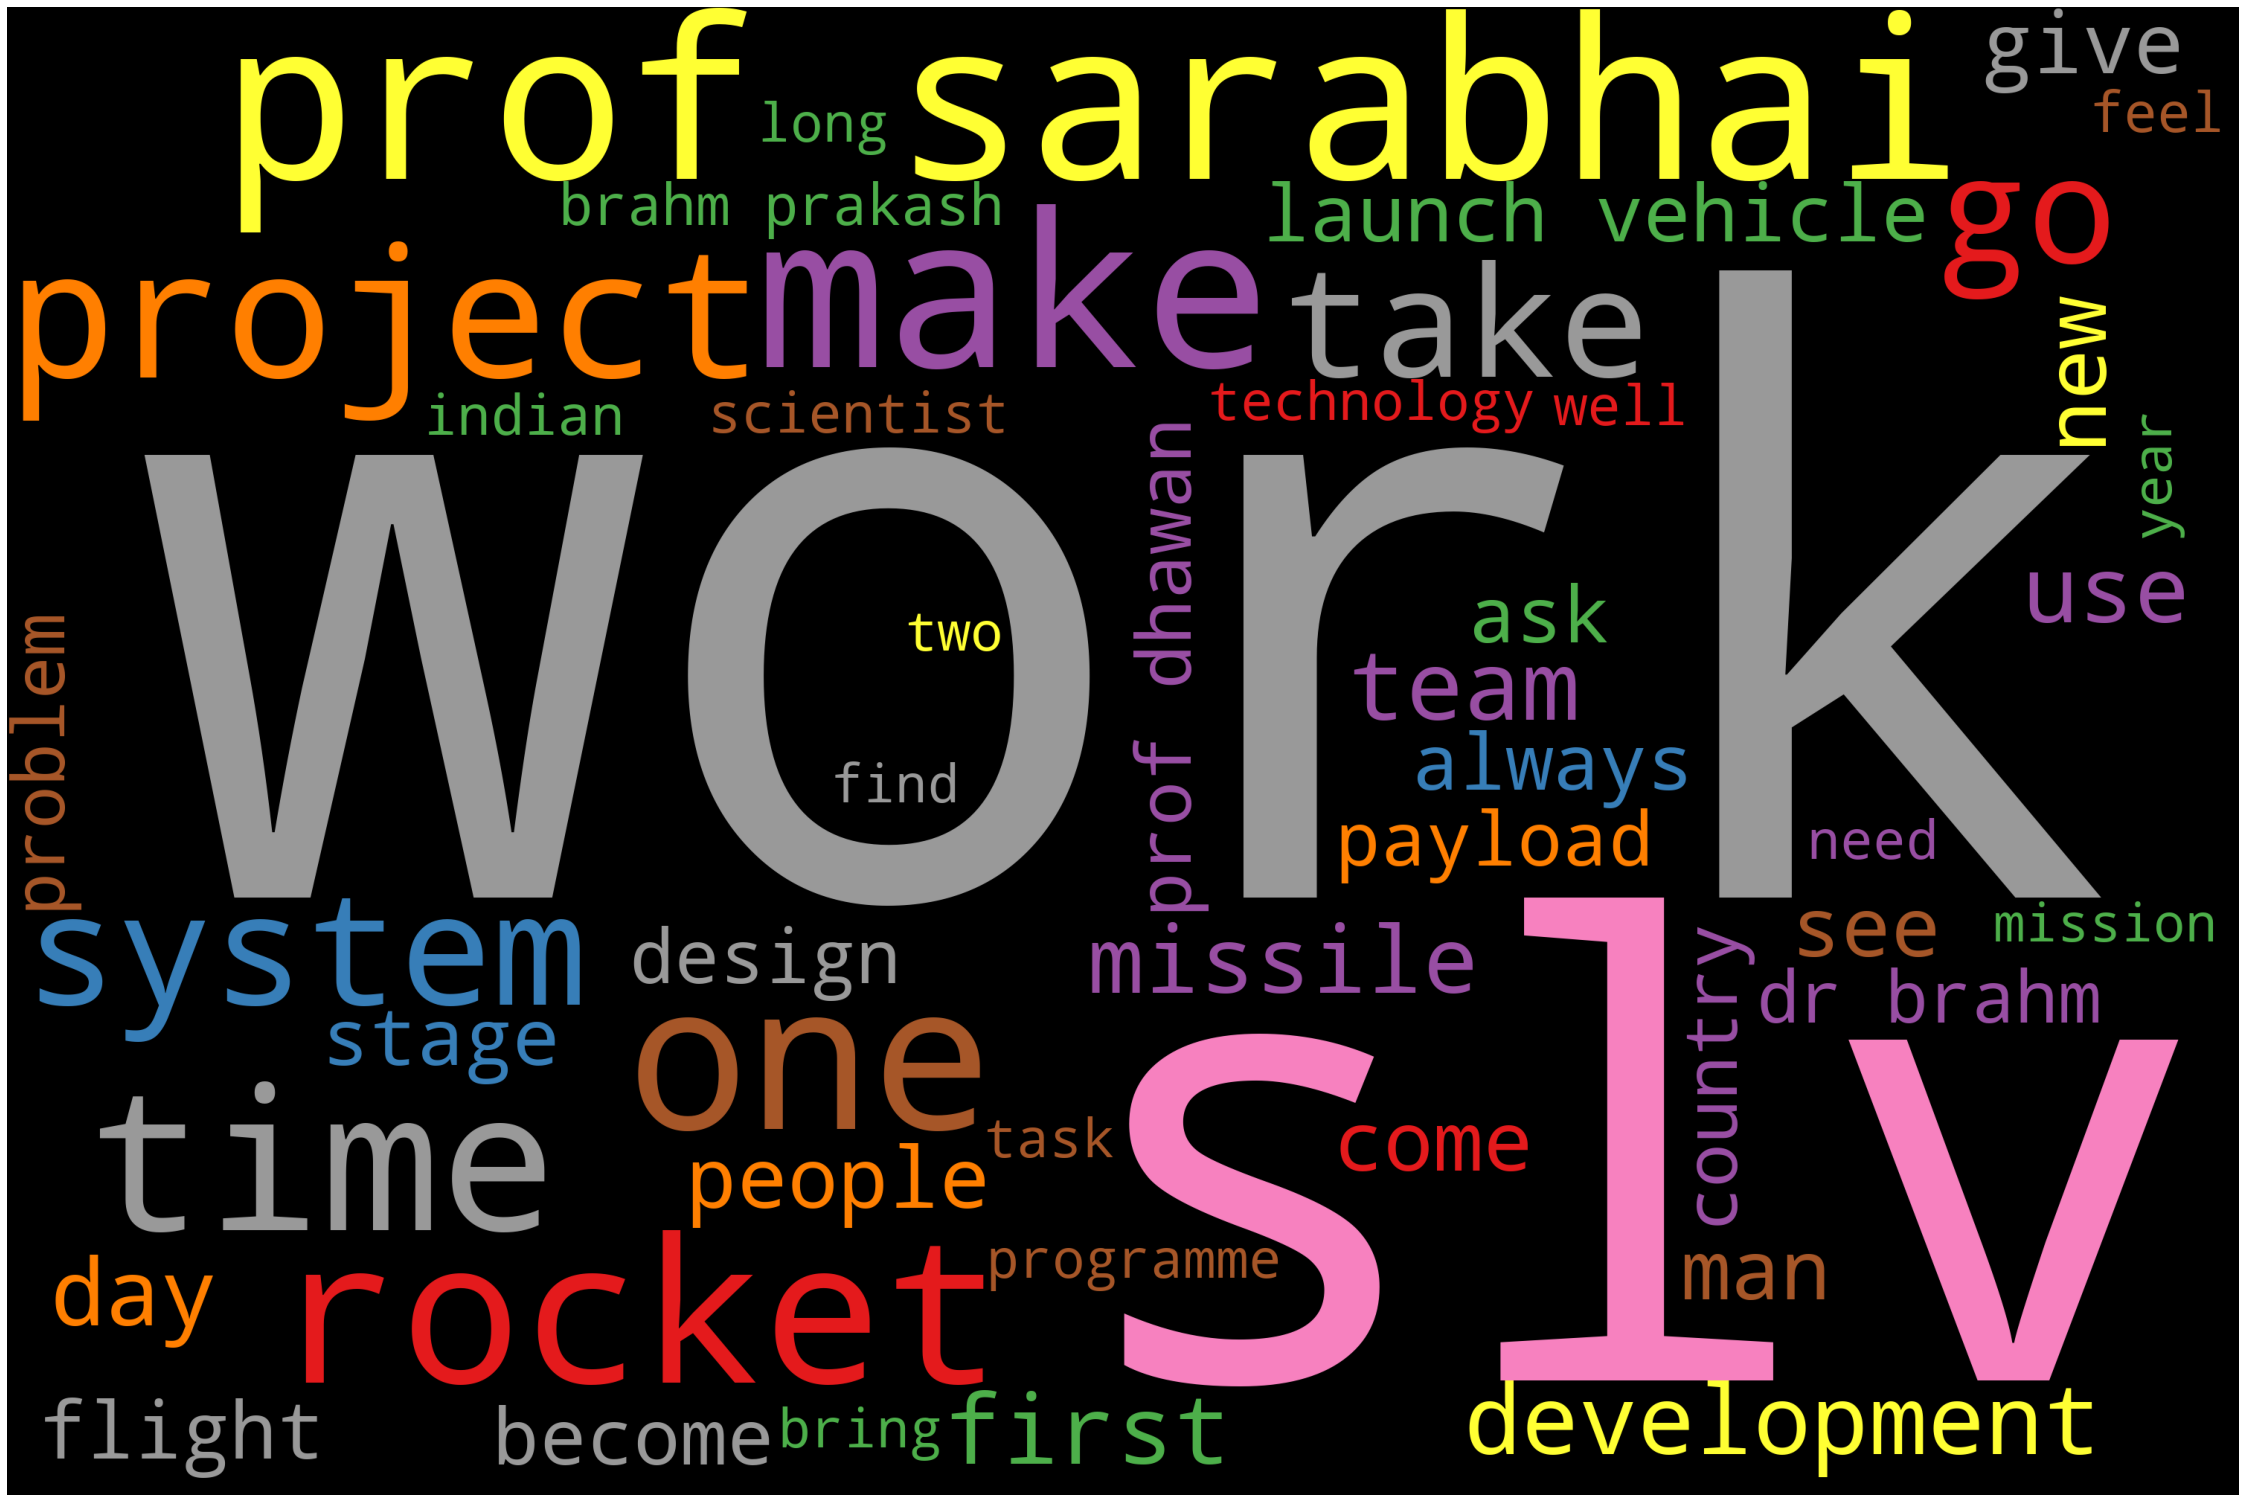

In [54]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_df)
plot_cloud(wordcloud)

###  Named Entity Recognition

In [55]:
#parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_df
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [56]:
for token in doc_block[100:200]:
    print(token,token.pos_)

painting NOUN
catch NOUN
eye NOUN
soldier NOUN
side NOUN
launch NOUN
rocket PROPN
white PROPN
darkskinne PROPN
racial ADJ
feature NOUN
people NOUN
find VERB
south ADJ
asia PROPN
one NUM
day NOUN
curiosity NOUN
got VERB
well ADV
draw NOUN
towards ADP
paint NOUN
it PRON
turn VERB
tipu PROPN
sultan PROPN
' PART
army NOUN
fighting NOUN
british ADJ
the DET
painting NOUN
depict NOUN
fact NOUN
forget VERB
tipu PROPN
' PART
country NOUN
commemorate NOUN
side NOUN
planet NOUN
happy ADJ
see VERB
indian PROPN
glorify PROPN
nasa PROPN
hero PROPN
warfare NOUN
rocketry NOUN
my PRON
impression NOUN
american ADJ
people NOUN
summarize VERB
quotation NOUN
benjamin PROPN
franklin PROPN
" PUNCT
those DET
thing NOUN
hurt VERB
instruct VERB
" PUNCT
realise VERB
people NOUN
part NOUN
world PROPN
meet NOUN
problem NOUN
head NOUN
they PRON
attempt VERB
get AUX
rather ADV
suffer VERB
my PRON
mother NOUN
narrate ADJ
incident PROPN
holy PROPN
book NOUN
— PUNCT
god PROPN
create VERB
man PROPN
ask PROPN
angel PROPN

In [57]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['mother', 'book', 'create', 'prostrate', 'prostrate', 'ask', 'create', 'fire', 'clay', 'make', 'adam', 'contend', 'say', 'go', 'paradise', 'place', 'pride', 'curse', 'fate', 'follow', 'suit', 'become', 'eat', 'forbidden', 'fruit', 'say', 'go', 'descendant', 'life', 'doubt', 'mistrust', 'make', 'organization', 'prevalence', 'pride', 'stop', 'listen', 'people', 'line', 'expect', 'person', 'deliver', 'result', 'humiliate', 'expect', 'abuse', 'despise', 'line', 'firmness', 'harshness', 'leadership', 'bully', 'discipline', 'vindictiveness', 'draw', 'line', 'draw', 'country', 'today', 'hero', 'side', 'hero', 'keep', 'people', 'side', 'situation', 'change', 'process', 'confront', 'solve', 'problem', 'require', 'work', 'procrastination', 'problem', 'cut', 'edge', 'distinguish', 'success', 'failure', 'draw', 'courage', 'wisdom', 'return', 'rocket', 'launch', 'take', 'place', 'sound', 'rocket', 'call', 'nikeapache', 'make', 'rocket', 'assemble', 'church', 'building', 'refer', 'equipment', 'tran

In [58]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,work,106
1,rocket,91
2,project,73
3,make,72
4,launch,64
5,system,64
6,slv,63
7,time,59
8,take,58
9,team,58


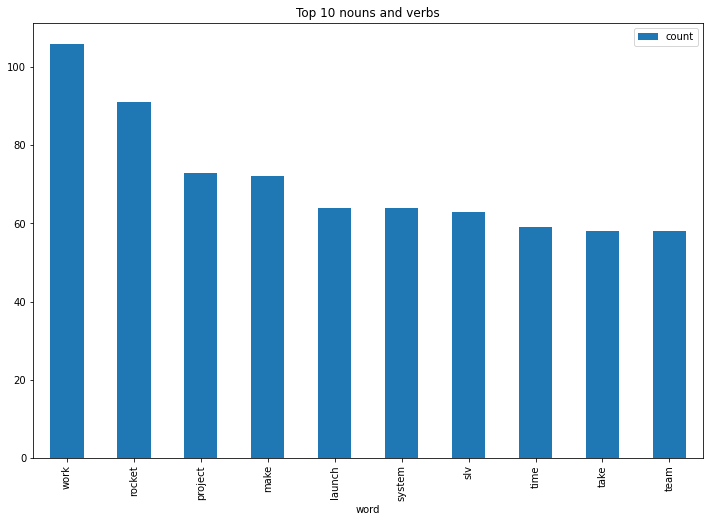

In [59]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');